# Introduction to grayscale and color images

__Authors/Copyright:__ Masa Prodanovic and James McClure, all right reserved. \
__Update:__ October 2020

Images are all around us, and most computers, including your phone, can very easily process them.

Most often they are color images (such as taken by your phone or camera) and most often, the end objective is beauty, art, sharing on social media or some emotional value. Thus image processing for that type of objective is not necessarily careful about distorting original image values.

If the ultimate objective is scientific, we have to be mindful of how values are stored or manipulated.

## Color vs. grayscale images
Storing color requires specific handling, and one way called RGB is to store three images that mix red (R), green (G) and blue (B) colors. 

Each of the RGB channels has numerical values between 0 and 255 (1 byte / 8 bits)/ of data each); sometimes these are stored is so-called 24-bit  RGB format. Other possibilities are HSV and hexadecimal format (often used in webpages). 
- You can play with all of the formats on the following webpage:
https://www.rapidtables.com/web/color/RGB_Color.html

- Test burnt orange color with 191, 87, 0 (https://brand.utexas.edu/identity/color/)

Grayscale images simply have all three R,G,B the same (check by inputting 191,191,191 and 87,87,87 on the webpage above). Thus they are simply represented by a single value (single image).

## Digital Rock Physics images

In digital rocks physics, images simply depict (or correlate) with a measurement. In X-ray imaging, there is a single measurement of an x-ray attenuation factor (its absolute value is not always meaningful unless calibrated, this is done in medical CT, but not in microtomography). Thus they are mostly shown as grayscale (they also get very large, so storing color images is too expensive). Any *appearance of color is just for beauty*, i.e. it is fake color.

- Example grayscale SEM images on DRP (2D): https://www.digitalrocksportal.org/projects/256

- Example grayscale CT images on DRP (3D): https://www.digitalrocksportal.org/projects/125 

In optical imaging, such as done for thin sections, the color is true (i.e. the one we see with our eyes). 

- Example true color image: https://www.digitalrocksportal.org/projects/244/origin_data/978/

- Example fake color images are velocity field raw files on: https://www.digitalrocksportal.org/projects/175

# Python and image processing

Images are 1D, 2D, 3D arrays and are best processed as NumPy arrays, that also allows scientific computation on them. Since computer memory is limited, we have different ways of storing integers and real numbers, and that is important to understand in any kind of scientific application (images included). __We assume basic knowledge of Python and NumPy, and if not, the set of fully worked out examples should speed you up in using NumPy for the purpose of image manipulation.__


- __Skimage__: We will work here with __scikit-image (a.k.a. skimage__; https://scikit-image.org/) distribution built on top of NumPy and SciPy that comes in most scientific Python environments, including Anaconda. We assume basic knowledge of NumPy.
    - There are numerous places that introduce skimage. One suggestion is:
https://scipy-lectures.org/packages/scikit-image/#scikit-image-and-the-scipy-ecosystem.
    - I adapt the examples found on the web here to Digital Rock Physics. The full list of modules in skimage is available as an API reference https://scikit-image.org/docs/stable/api/api.html

- Other general image libraries in Python are __PIL/Pillow__ and __OpenCV2__. I will invoke them as necessary, but I presently judge skimage to be more mature. __Note that the software space constantly changes.__

- PoreSpy software for image processing in porous media is relatively new and worth checking out since it is linked to various simulation tools for porous media: https://joss.theoj.org/papers/10.21105/joss.01296 

# Image processing outside Python
- MATLAB image processing is mature: https://www.mathworks.com/products/image.html?s_tid=srchtitle, alas paid license is necessary. Octave is free source version, but lags in speed.
- Fiji/ImageJ: https://imagej.net/Fiji, open source. Many image processing algorithms are implemented and GUI works well which is great for testing things out. From the automation (scripting) point of view it is not ideal, but Python is available as a scripting language.

# Examples 
## Example 1: seeing NumPy 2D arrays as images
In this example, we will create a simple 3 by 5 array and show it visually on the screen.
We will start with an image of 0's and 1's.

- NumPy has a range of commands that initialize arrays of any dimension: numpy.zeros (shown below), numpy.ones, numpy.random.rand -- numerous NumPy resources online review this.
- Full list of functions working with NumPy ndarrays can be found here:
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html
- _matplotlib.pyplot.imshow_ command from omnipresent Matplotlib module is used for showing 2D images


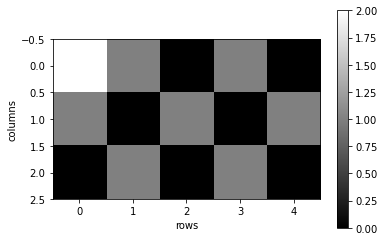

In [3]:
# Required modules
import numpy as np
import matplotlib.pyplot as plt

# Initialize all of the 3 by 5 array/matrix as zeros.
# (3, 5) is shape of the array - (nrows, ncols)
check = np.zeros((3, 5))

# Recall that you can 'slice' any dimension of the 
# array using start:stop:step (and step is optional)
# - If you omit start, stop or step, that implies all of them will be included.
# - Indices start from 0

# Set to 1 every second element in row dimension AND every second starting from 1 in the column dimension
check[::2, 1::2] = 1 
# Set to 1 every second element in row dimension starting from element 1 AND every second in column dimension
check[1::2, ::2] = 1

#  
# check[0,0] = 2

#  if color map, which is arbitrary, is set to 'gray' zero will 
# visualize as black, 1 as white
plt.imshow(check,cmap='gray')
plt.xlabel('rows')
plt.ylabel('columns')
plt.colorbar()

__Questions and comments__:
1. Check what happens if you change cmap to 'summer' in plt.imshow command, or if you remove cmap part of command altogether.
2. Which corner of the image does  (0,0) element of the image origin start? Is that the same as the Cartesian coordinate system (and the way we usually plot it on a 2D graph)? 
3. Set element check[0,0] to 2 in order to visualize the origin of the image, and notice how that shifts the colors in the image.

## Example 2a: reading and analyzing an image available online
Download Digital Rocks Portal cover image and show it.
Key commands:
- skimage.io.imread
- matplotlib.pyplot.imshow

As long as you know the address of the target image, this can be easily reproduced for any other image:

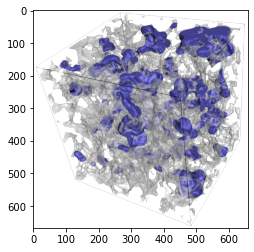

In [4]:
import skimage
from skimage import io

# This is a small image test with the cover image from Digital Rocks Portal
cover_url = 'https://www.digitalrocksportal.org/static/images/cover-image.png'
cover_img = io.imread(cover_url)
plt.imshow(cover_img)


Instead of the cover_url above, you can provide a filename (including the directory path) to an image downlaoded on your computer.
- On my Windows laptop (my user name is 'texas') this defaults to:
    download_path = "C:\Users\texas\Downloads\cover_image.png"
- If the image is in the same directory as the code, then you need only  "cover_image.png" as the name of the file.


__Digital Rocks Image Dataset__

Right now, figuring out what is the web location of a file on Digital Rocks Portal requires manual work.
Dataset webpage is just a "landing page" that contains metadata about the actual dataset, 
e.g. https://www.digitalrocksportal.org/projects/256/origin_data/1028/ has a 2D SEM image of a North Sea Sandstone.
To get the location of the actual SEM image on the webpage, point your mouse over "Download" button and copy link location. In this example you will get this: https://www.digitalrocksportal.org/projects/256/images/169809/download/

Here is how to read the data at the above URL:


In [8]:
# either of the below URLs should point to the SEM image in Project 256. This is a larger image, 
# and the same imread seems to take time and than gives me trouble. 
# You might need to wait a moment for the process to finish!
imgurl = 'https://www.digitalrocksportal.org/projects/256/images/169809/download/'
imgurl  = "https://www.digitalrocksportal.org/media/projects/256/origin/1028/images/plug_44_image_13-0.png"

image   = io.imread(imgurl)
plt.imshow(image)

# If the image is downloaded in the same directory as this Notebook, you can uncomment:
#download_path = "plug_44_image_13-0.png"
#image = io.imread(download_path)


DecompressionBombError: Image size (201326592 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

You will notice that:
- the execution is "queued" (* appears next to the cell) because it takes a 20 seconds or more  to execute
- (on my laptop, 16GB of RAM/Windows, at least; result vary by hardware/software) it ultimately  fails on your computer with "DecompressionBombError", something to do with image size.
- (on my laptop, 16GB of RAM/Windows) the loading fails after skimage tries a number of libraries to load the image (it goes down a list of available options). The last one points to the Pillow library that was ultimately called to read the image. 

The problem with this image is that is  too big for the defaults set by some Python distributions. This is really common in the area of Digital Rock Petrophysics, be it for 2D or 3D images. Imaging (of any kind!) continuously improves at a pace faster than image processing ability!

- Downloading commented in the above cell and then reading from the local file does not work either, and neither did moving to Spyder.
- I have found the fix for Pillow library on stack overflow (https://stackoverflow.com/questions/51152059/pillow-in-python-wont-let-me-open-image-exceeds-limit), and below is the new code with that fix.
- On my laptop it takes approx. 40 seconds to read and plot the image.



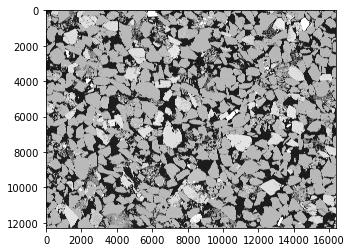

In [5]:
#either of the below URLs should point to the SEM image in Project 256. This is a larger image, 
# and the same imread seems to take time and than gives me trouble. You might see "Execution queued"
imgurl = 'https://www.digitalrocksportal.org/projects/256/images/169809/download/'
imgurl  = "https://www.digitalrocksportal.org/media/projects/256/origin/1028/images/plug_44_image_13-0.png"


# This is the fix for the built in maximum image size.
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

image   = io.imread(imgurl)

# Basic plot, using gray colors (note that in this image, any color would be fake)
plt.imshow(image,cmap='gray')

# If you want to save this file locally, then choose a name and use io.imsave similar to the commented command below.
# io.imsave('sem_image_local_file.png',image)


Let's do basic inspection of the image. One needs to be aware of it, as a lot of error in scientific visualization or image processing can result from not understanding what numbers are you working with. 

The image is read into a NumPy ndarray. 

- __Image size:__ have to know it or it can cause a lot of drama (see above)!
- __Image data type:__ some functions might be programmed to work only with integers or floats. Color mode (such as RGB) takes three times the space and storage. If you do not use functions appropriately, you will get garbage output.
Different integer data types are possible: 8-, 16- or 32-bytes, signed or unsigned (start with 'u').
- __Basic stats__: min, maximum, average of valuesImage histogram



In [ ]:
print('\nImage size',image.size, '-- in megabytes this is approximately',image.size/1000000,'MB.')
print('\nImage (ndarray) shape',image.shape)
print('\nImage data type',image.dtype)

# This is a 2D image, and min, max and mean functions are programmed to work by dimension. 
# So we will reshape the array. 
# Be mindful that below we are on purpose creating another copy of the array (and doubles the memory use)
nrows,ncols = image.shape;
reshaped_image = np.copy(image) 
reshaped_image.shape = (nrows*ncols,)

# min, max, mean are functions that are built into ndarray class in NumPy. If we call them such as in example below,
# then they will execute on the ndarray reshaped_image
print('\nImage values min:', reshaped_image.min(), 'max:',reshaped_image.max(), 'mean:',reshaped_image.mean())

#Histogram
# histogram has 256 bins, is normalized (density=True),
# so that comparison with other images of different size is possible and is shown in green color
plt.hist(reshaped_image, 256, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Image value')
plt.ylabel('Probability')

#adds text in a specific location
#plt.text(50, .025, 'Any comment') 

#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


__Extra: Customizing color in matplotlib__

matplotlib gives you 4 ways to specify colors,

    1) as a single letter string, ala MATLAB

    2) as an html style hex string or html color name

    3) as an R,G,B tuple, where R,G,B, range from 0-1

    4) as a string representing a floating point number
       from 0 to 1, corresponding to shades of gray.

See help(colors) for more info.

Below you will see example of setting the color of the histogram to burnt orange (R,G,B values are 191, 87, 0, respectively). 


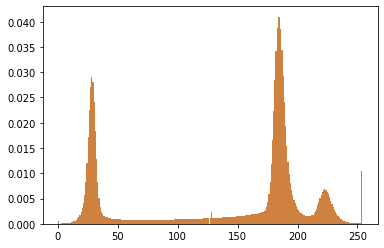

In [47]:
plt.hist(reshaped_image, 256, density=True, facecolor=(191/255,87/255,0), alpha=0.75)
plt.show()


__Color images__

Color images are of shape (N, M, 3) or (N, M, 4) (when the fourth, 'alpha', channel encodes transparency.
                                                  
Routines converting between different colorspaces (RGB, HSV, LAB etc.) are available 
in skimage.color : color.rgb2hsv, color.lab2rgb, etc. 
                                                  
Example below inspects the cover image we read in at the very beginning, 
and shows histograms of appropriate channels.

(668, 658, 4)
1758176
uint8


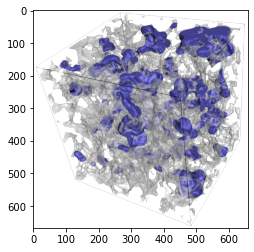

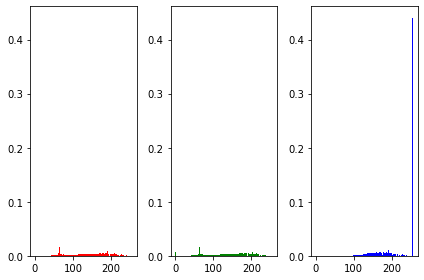

In [17]:
# We have never inspected the color cover image that we read in the first place. 
print(cover_img.shape)
print(cover_img.size)
print(cover_img.dtype)

# This is a color image as indicated by the shape, and imshow command seems to understand that.
plt.imshow(cover_img)

# We are going to plot histograms of red, green and blue channels separately.

nrows,ncols,nchannels = cover_img.shape;
reds = np.copy(cover_img[:,:,0]);   reds.shape = (nrows*ncols,);
greens = np.copy(cover_img[:,:,1]); greens.shape = (nrows*ncols,);
blues = np.copy(cover_img[:,:,2]);  blues.shape = (nrows*ncols,);

#Histogram
# histogram has 256 bins, is normalized (density=True),
# so that comparison with other images of different size is possible and is shown in green color

# All three histograms will be on one figure in a 1 by 3 layout
fig, axes = plt.subplots(1, 3, tight_layout=True);

n_bins = 256
axes[0].hist(reds,   bins=n_bins, density=True, facecolor='r');
axes[1].hist(greens, bins=n_bins, density=True, facecolor='g');
axes[2].hist(blues,  bins=n_bins, density=True, facecolor='b');


# Cropping the image and inspecting a specific value
- numpy.copy()

x 10 y 220 value 28


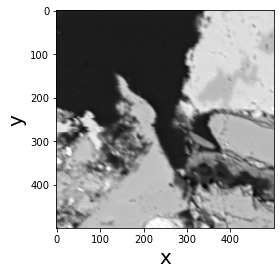

In [7]:
# Let's now crop the original image so we can inspect it better.

sub = np.copy(image[0:500,0:500])
plt.imshow(sub,cmap='gray')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

# Example location value
x=10
y=220
print('x',x,'y',y,'value',sub[x,y])


In [ ]:
# Testing the interactive image viewer
# This opens a separate window, so look for it outside of the browser.
from skimage import viewer
#from .core import *
new_viewer = viewer.ImageViewer(sub) 

# This adds a tool for plotting a line, and displays line profile of value along those lines.
from skimage.viewer.plugins import lineprofile
from skimage.viewer.plugins import crop
#from .core import *

new_viewer += lineprofile.LineProfile() 
new_viewer += crop.Crop()
new_viewer.show()


Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.
Crop tool
Select rectangular region and press enter to crop.


__Questions__


Move around the image in the viewer and see how the values change. Relate those values to the histogram. What range, approximately, is what is shown as black? How about light gray?

Move your cursor to location [x,y] indicated in the previous cell, and confirm that you see that same value.

With the line profile tool, note that:
- '+' and '-' keys or mouse scroll changes width of scan line. 
- Select and drag ends of the scan line to adjust it.

Draw a line in multiple locations, and see how image values change along the line.

# Suggested exercises

1. (_Programming exercise_)
Based on the exercises above, create a histogram function in Python that produces either a single grayscale or a color histogram of the image (which is really just numpy array), and sets the plots either with the colors chosen above (or just the way you like them).  

Test the function on the above on image 'sub' (500 by 500), as well as a color image (use one of the smaller ones) of choice available on: https://www.digitalrocksportal.org/projects/244/origin_data/978/

    - The function needs to correctly recognize if the image has one channel, or three or more (i.e. it is color), and plot histogram accordingly. The fourth channel (transparency) should be ignored (and the function should comment why is that so). 
    - For now assume that any color image is RGB (and print a warning saying so). Default number of bins should be 256.


2. Create a function that takes a color image (numpy array with at least three channels) and shows R, G, and B channels as separate images on the same figure (with appropriate titles for each channel). The colormaps should be chosen to be on red/gray scale (i.e. going from black to red, or white to red), green/gray and blue/green and should show the colormaps on the side for guidance. REady-to-go colormaps are available here:
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
Test your plot on the color image you worked with in 1b.

3. __(Large Image Challenge)__: can you read/display the largest .jpx file on https://www.digitalrocksportal.org/projects/244/origin_data/978/. It is 3.5GB. jpx refers to a large jpeg format. If direct reading from online location does not work, try downloading to a local folder on your computer first.